In [28]:
import numpy as np
import pandas as pd
import os,sys

In [29]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
fishing_data_path = os.path.join(path_data,'bin_fishing_activity')

In [30]:
region = 'Asia'
if region == 'Asia':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = 100, 140
elif region == 'North America':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = -100, -60

years = np.arange(2012,2019)

In [31]:
# if region == 'North America':
#     get 12 grid
#     grid 1: lat_bin = (15,20), lon_bin = (-90,-85)
#     grid 2: lat_bin = (20,25), lon_bin = (-90,-85)
#     grid 3: lat_bin = (15,20), lon_bin = (-85,-80)
#     grid 4: lat_bin = (20,25), lon_bin = (-85,-80)
#     grid 5: lat_bin = (15,20), lon_bin = (-80,-75)
#     grid 6: lat_bin = (20,25), lon_bin = (-80,-75)
#     grid 7: lat_bin = (15,20), lon_bin = (-75,-70)
#     grid 8: lat_bin = (20,25), lon_bin = (-75,-70)
#     grid 9: lat_bin = (15,20), lon_bin = (-70,-65)
#     grid 10: lat_bin = (20,25), lon_bin = (-70,-65)
#     grid 11: lat_bin = (15,20), lon_bin = (-65,-60)
#     grid 12: lat_bin = (20,25), lon_bin = (-65,-60)
# elif region == 'Asia':
#     get 9 grids
#     grid 1: lat_bin = (0,5), lon_bin = (120,125)
#     grid 2: lat_bin = (5,10), lon_bin = (120,125)
#     grid 3: lat_bin = (10,15), lon_bin = (120,125)
#     grid 4: lat_bin = (0,5), lon_bin = (115,120)
#     grid 5: lat_bin = (5,10), lon_bin = (115,120)
#     grid 6: lat_bin = (10,15), lon_bin = (115,120)
#     grid 7: lat_bin = (0,5), lon_bin = (110,115)
#     grid 8: lat_bin = (5,10), lon_bin = (110,115)
#     grid 9: lat_bin = (10,15), lon_bin = (110,115)

grids_north_america = [
    ("(15, 20]", "(-90, -85]"),
    ("(20, 25]", "(-90, -85]"),
    ("(15, 20]", "(-85, -80]"),
    ("(20, 25]", "(-85, -80]"),
    ("(15, 20]", "(-80, -75]"),
    ("(20, 25]", "(-80, -75]"),
    ("(15, 20]", "(-75, -70]"),
    ("(20, 25]", "(-75, -70]"),
    ("(15, 20]", "(-70, -65]"),
    ("(20, 25]", "(-70, -65]"),
    ("(15, 20]", "(-65, -60]"),
    ("(20, 25]", "(-65, -60]")
]

grids_asia = [
    ("(0, 5]", "(120, 125]"),
    ("(5, 10]", "(120, 125]"),
    ("(10, 15]", "(120, 125]"),
    ("(0, 5]", "(115, 120]"),
    ("(5, 10]", "(115, 120]"),
    ("(10, 15]", "(115, 120]"),
    ("(0, 5]", "(110, 115]"),
    ("(5, 10]", "(110, 115]"),
    ("(10, 15]", "(110, 115]")
]

def filter_data_for_region(data, region):
    if region == 'North America':
        grids = grids_north_america
    elif region == 'Asia':
        grids = grids_asia
    else:
        raise ValueError("Region not recognized")

    filtered_data = pd.DataFrame()
    for lat_bin, lon_bin in grids:
        matching_data = data[
            (data['lat_bin'] == lat_bin) & 
            (data['lon_bin'] == lon_bin)
        ]
        filtered_data = pd.concat([filtered_data, matching_data], ignore_index=True)
    
    return filtered_data

In [32]:
mean_fishing_years = []
for year in years:
    # load data
    bin_fishing_activity_year = pd.read_csv(os.path.join(fishing_data_path,'bin_fishing_activity_{}.csv'.format(year)))
    bin_fishing_activity_year = filter_data_for_region(bin_fishing_activity_year, region)
    # get mean fishing activity
    mean_fishing_activity_year = bin_fishing_activity_year.groupby(['lat_bin','lon_bin']).mean().reset_index()
    # get the scalar value
    mean_fishing_activity_year = mean_fishing_activity_year['fishing_hours'].values
    mean_fishing_activity_year = np.mean(mean_fishing_activity_year)
    # append to list
    mean_fishing_years.append(mean_fishing_activity_year)

print(mean_fishing_years)

[0.0, 7.571455555555556, 2.7112611111111113, 32.1564, 20.34868888888889, 124.09209261904763, 182.35094298059963]


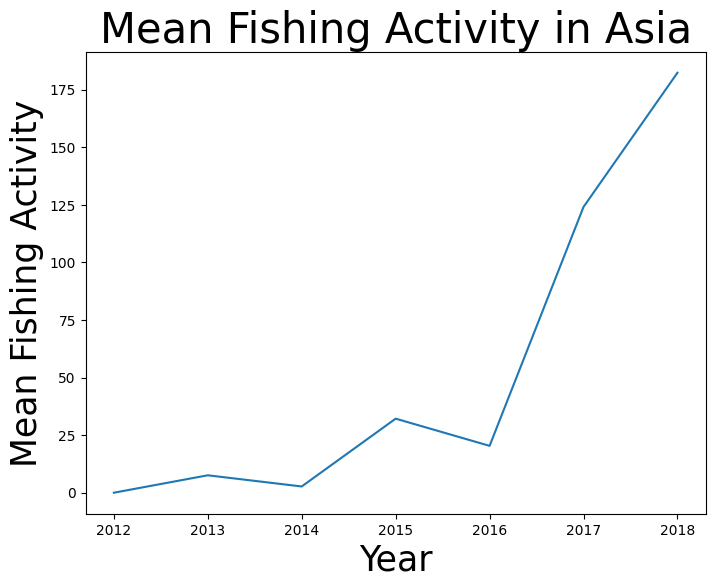

In [35]:
# plot mean fishing activity
import matplotlib.pyplot as plt
fontsize = 25
fontsize_title = 30
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(years, mean_fishing_years)
ax.set_xlabel('Year', fontsize=fontsize)
ax.set_ylabel('Mean Fishing Activity', fontsize=fontsize)
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_title('Mean Fishing Activity in {}'.format(region), fontsize=fontsize_title)
plt.tight_layout()

plt.show()